## SARIMA, ARIMA & Scores - First trial, can be developed more...

## Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import pickle

### Load Data

In [2]:
def load_data():
    return pd.read_csv('./arima_df.csv').set_index('date')

ts_data = load_data()

In [3]:
ts_data.index = pd.to_datetime(ts_data.index)

In [4]:
ts_data

,orders_diff
date,
2012-04-08,-19.821429
2012-04-15,26.857143
2012-04-22,44.285714
2012-04-29,5.428571
2012-05-06,-167.142857
2012-05-13,-59.571429
2012-05-20,-25.714286
2012-05-27,18.285714
2012-06-03,-41.857143


### SARIMAX Modeling

In [5]:
def get_scores(data):
    
    model_scores = {}
    
    rmse = np.sqrt(mean_squared_error(data.orders_diff[-12:], data.forecast[-12:]))
    mae = mean_absolute_error(data.orders_diff[-12:], data.forecast[-12:])
    r2 = r2_score(data.orders_diff[-12:], data.forecast[-12:])
    model_scores['ARIMA'] = [rmse, mae, r2]
    
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R2 Score: {r2}")
    
    pickle.dump(model_scores, open( "arima_model_scores.p", "wb" ))

#### Assuming there is a seasonal pattern

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/riditaali/opt/anaconda3/envs/tf3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
/Users/riditaali/opt/anaconda3/envs/tf3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
/Users/riditaali/opt/anaconda3/envs/tf3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/Users/riditaali/opt/anaconda3/envs/tf3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' 

<AxesSubplot:xlabel='date'>

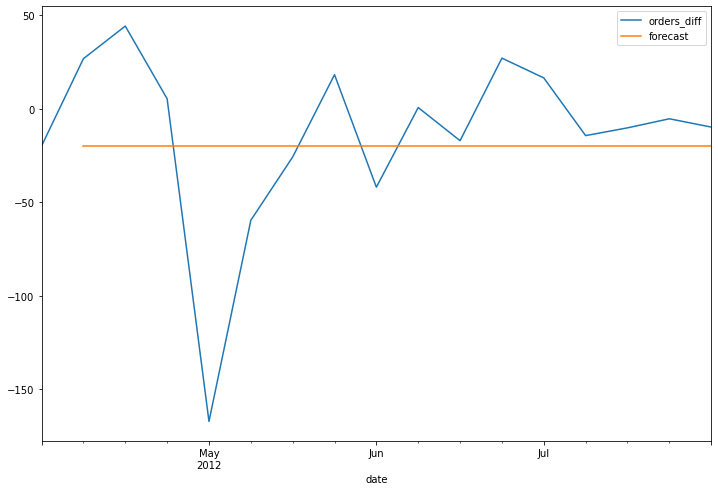

In [6]:
model=sm.tsa.statespace.SARIMAX(ts_data['orders_diff'],order=(1, 1, 1),seasonal_order=(1,1,1,17))
results=model.fit()
ts_data['forecast']=results.predict(start=1,end=100,dynamic=True)
ts_data[['orders_diff','forecast']].plot(figsize=(12,8))

#### compose scores

In [8]:
scores = get_scores(ts_data)
scores

RMSE: 25.739133167037224
MAE: 21.029761904761894
R2 Score: -0.16752858491555633
